In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 

Load the Dataset from CSV 

In [2]:
df = pd.read_csv("Phone_Dataset.csv")
df

,RAM(GB),ROM(GB),Display(inches),Price($)
0,8,64,5.4,500
1,4,512,5.9,500
2,12,64,6.8,200
3,6,32,5.6,600
4,4,512,6.6,700
5,12,32,5.4,600
6,6,512,6.5,250
7,8,32,5.6,250
8,12,512,5.4,150
9,16,512,5.9,300


In [3]:
df.rename(columns={"RAM(GB)": "ram"}, inplace=True)
df.rename(columns={"ROM(GB)": "rom"}, inplace=True)
df.rename(columns={"Display(inches)": "display"}, inplace=True)
df.rename(columns={"Price($)": "price"}, inplace=True)

In [4]:
X = df[["ram", "rom", "display"]]
y = df["price"]

Split Data into Training and Testing Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Perform Regression with Vector Algebra

In [20]:
X_train_aug = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [21]:
X_transpose = X_train_aug.T
beta_vector_algebra = np.linalg.inv(X_transpose @ X_train_aug) @ X_transpose @ y_train

In [43]:
y_pred_vector_algebra = X_test_aug @ beta_vector_algebra
print("Coefficients (Vector Algebra):", beta_vector_algebra)

Coefficients (Vector Algebra): [ 3.81544627e+02  1.76420296e-01 -2.51641802e-01  2.23052890e+01]


Plot Results

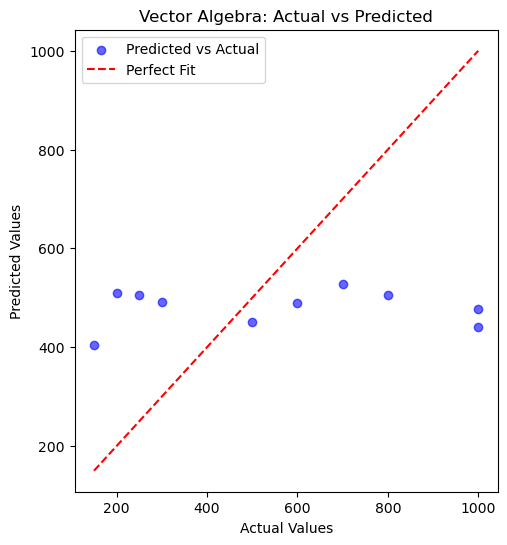

In [44]:
# Plot actual vs predicted values for vector algebra
plt.figure(figsize=(12, 6))


# Vector Algebra plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_vector_algebra, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Vector Algebra: Actual vs Predicted')
plt.legend()

Perform Regression with scikit-learn

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
coefficients_sklearn = model.coef_
intercept_sklearn = model.intercept_

In [28]:
y_pred_sklearn = model.predict(X_test)

In [29]:
coefficients_sklearn

array([ 0.1764203 , -0.2516418 , 22.30528905])

In [30]:
intercept_sklearn

381.5446269348782

Plot Results

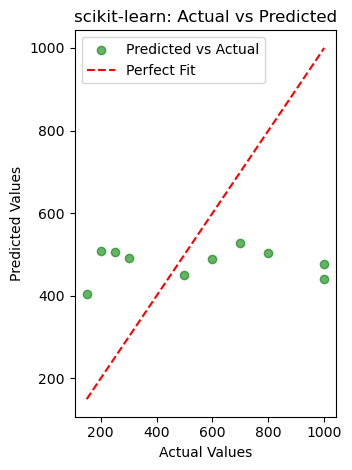

In [39]:
# scikit-learn plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, color='green', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('scikit-learn: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

Evaluate Models

In [34]:
# Evaluate the model using Vector Algebra
mse_vector_algebra = mean_squared_error(y_test, y_pred_vector_algebra)
r2_vector_algebra = r2_score(y_test, y_pred_vector_algebra)


In [35]:
# Evaluate the model using scikit-learn
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

In [40]:
print("Vector Algebra - MSE:", mse_vector_algebra, "R²:", r2_vector_algebra)
print("scikit-learn - MSE:", mse_sklearn, "R²:", r2_sklearn) 

Vector Algebra - MSE: 97930.58655558247 R²: -0.05301705973744597
scikit-learn - MSE: 97930.58655558267 R²: -0.05301705973744797
